In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
from fredapi import Fred
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [14]:
fred = Fred(api_key='63c26e16e93cb78d3ef46638747ab5ef')

In [27]:
data = w.wsd('881001.WI', 'close', '2000-01-01', '2019-03-31', 'Period=M')

In [28]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['881001.WI'])
df.index = pd.to_datetime(df.index)

In [16]:
data = fred.get_series('CHIEPUINDXM')

In [21]:
udf = pd.DataFrame({'uncertainty': data})

In [23]:
udf = udf[udf.index >= '2000-01-01']

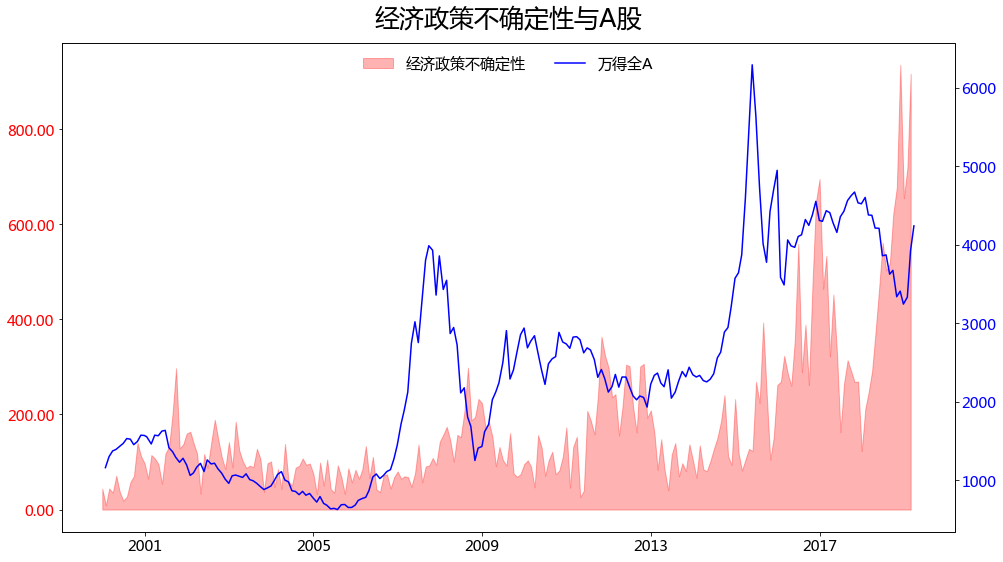

In [42]:
fig, ax = plt.subplots(figsize=(16, 9))
lns1 = ax.fill_between(udf.index, 0, udf['uncertainty'], color='red', label=u'经济政策不确定性', alpha=0.3)
axx = ax.twinx()
lns2 = axx.plot(df['881001.WI'], color='blue', label=u'万得全A')
lns = [lns1] + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals], color='red')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='blue')
_ = ax.set_title(u'经济政策不确定性与A股', fontsize=25, y=1.02)